In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

## Step 1 
- pd.read_html() returns a list of tables (converted to dataframes) from an HTML page
- Grab the first table using 0-index & select the columns we want

In [79]:

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0][['Symbol', 'GICS Sector']]
tickers

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials


## Step 2
Clean the ticker data. Yahoo Finance has tickers for some companies with a hyphen in them. Ex. Brown-Forman Corporation (NYSE: BF-B). However, the ticker from the Wikipedia page is in the form BF.B. Yfinance will throw an error so clean the data to prevent errors.

In [80]:
# Replace all '.' with a '-' in the symbol column
type(tickers['Symbol'])

# Internally, Pandas columns are stored as Series objects, which are essentially NumPy arrays (with some extra methods and properties)
# This is why we can use NumPy's vectorized string methods on the column at once rather than looping through each row
tickers['Symbol'] = tickers['Symbol'].str.replace('.', '-')
tickers[tickers['Symbol'] == 'BF-B']

,Symbol,GICS Sector
80,BF-B,Consumer Staples


## Step 3
- Convert the dataframe to a dictionary of key-value pairs
- Keys: Sectors, Values: Tickers in each sector

In [81]:
# Breakdown dataframe into keys of sectors & values of tickers
sector_breakdown = tickers.groupby('GICS Sector')['Symbol'].apply(list)
sector_breakdown = sector_breakdown.to_dict()
sector_breakdown

{'Communication Services': ['GOOGL',
  'GOOG',
  'T',
  'CHTR',
  'CMCSA',
  'DIS',
  'EA',
  'FOXA',
  'FOX',
  'IPG',
  'LYV',
  'MTCH',
  'META',
  'NFLX',
  'NWSA',
  'NWS',
  'OMC',
  'PARA',
  'TMUS',
  'TTWO',
  'VZ',
  'WBD'],
 'Consumer Discretionary': ['ABNB',
  'AMZN',
  'APTV',
  'AZO',
  'BBWI',
  'BBY',
  'BKNG',
  'BWA',
  'CZR',
  'KMX',
  'CCL',
  'CMG',
  'DHI',
  'DRI',
  'DPZ',
  'EBAY',
  'ETSY',
  'EXPE',
  'F',
  'GRMN',
  'GM',
  'GPC',
  'HAS',
  'HLT',
  'HD',
  'LVS',
  'LEN',
  'LKQ',
  'LOW',
  'LULU',
  'MAR',
  'MCD',
  'MGM',
  'MHK',
  'NKE',
  'NCLH',
  'NVR',
  'ORLY',
  'POOL',
  'PHM',
  'RL',
  'ROST',
  'RCL',
  'SBUX',
  'TPR',
  'TSLA',
  'TJX',
  'TSCO',
  'ULTA',
  'VFC',
  'WHR',
  'WYNN',
  'YUM'],
 'Consumer Staples': ['ADM',
  'MO',
  'BF-B',
  'BG',
  'CPB',
  'CHD',
  'CLX',
  'KO',
  'CL',
  'CAG',
  'STZ',
  'COST',
  'DG',
  'DLTR',
  'EL',
  'GIS',
  'HSY',
  'HRL',
  'K',
  'KVUE',
  'KDP',
  'KMB',
  'KHC',
  'KR',
  'LW',
  'MKC',

## Step 4
Get all tickers into a list to put into yfinance

In [82]:
# Get all tickers from sector_breakdown into a single list
ticker_list = []
for sector in sector_breakdown:
    ticker_list.extend(sector_breakdown[sector])

ticker_list   

['GOOGL',
 'GOOG',
 'T',
 'CHTR',
 'CMCSA',
 'DIS',
 'EA',
 'FOXA',
 'FOX',
 'IPG',
 'LYV',
 'MTCH',
 'META',
 'NFLX',
 'NWSA',
 'NWS',
 'OMC',
 'PARA',
 'TMUS',
 'TTWO',
 'VZ',
 'WBD',
 'ABNB',
 'AMZN',
 'APTV',
 'AZO',
 'BBWI',
 'BBY',
 'BKNG',
 'BWA',
 'CZR',
 'KMX',
 'CCL',
 'CMG',
 'DHI',
 'DRI',
 'DPZ',
 'EBAY',
 'ETSY',
 'EXPE',
 'F',
 'GRMN',
 'GM',
 'GPC',
 'HAS',
 'HLT',
 'HD',
 'LVS',
 'LEN',
 'LKQ',
 'LOW',
 'LULU',
 'MAR',
 'MCD',
 'MGM',
 'MHK',
 'NKE',
 'NCLH',
 'NVR',
 'ORLY',
 'POOL',
 'PHM',
 'RL',
 'ROST',
 'RCL',
 'SBUX',
 'TPR',
 'TSLA',
 'TJX',
 'TSCO',
 'ULTA',
 'VFC',
 'WHR',
 'WYNN',
 'YUM',
 'ADM',
 'MO',
 'BF-B',
 'BG',
 'CPB',
 'CHD',
 'CLX',
 'KO',
 'CL',
 'CAG',
 'STZ',
 'COST',
 'DG',
 'DLTR',
 'EL',
 'GIS',
 'HSY',
 'HRL',
 'K',
 'KVUE',
 'KDP',
 'KMB',
 'KHC',
 'KR',
 'LW',
 'MKC',
 'TAP',
 'MDLZ',
 'MNST',
 'PEP',
 'PM',
 'PG',
 'SJM',
 'SYY',
 'TGT',
 'TSN',
 'WBA',
 'WMT',
 'APA',
 'BKR',
 'CVX',
 'COP',
 'CTRA',
 'DVN',
 'FANG',
 'EOG',
 'EQT',
 'XO

## Step 5
- Extract data for all tickers through yfinance
- Extract the Adj Close for the past month

In [105]:
# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Get the date 5 years ago
month_ago = pd.Timestamp.today() - pd.DateOffset(months=60)

# Get data from yfinance for all tickers
data = yf.download(ticker_list, start=month_ago, end=today)

# Keep just the Adj Close column
data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
data

# IMPORTANT: Notice how yfinance doesn't throw an error for tickers like BF.B since we cleaned the inputs before extracting our dataset

[*********************100%%**********************]  503 of 503 completed


Adj Close                                                         \
                     A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2023-08-21  118.620842  15.16  175.839996  148.671875  124.000000  103.298180   
2023-08-22  117.403290  14.83  177.229996  146.770905  127.080002  104.571129   
2023-08-23  118.890289  14.78  181.119995  145.622391  128.130005  104.551231   
2023-08-24  119.249565  14.57  176.380005  145.176865  124.720001  103.178833   
2023-08-25  119.439186  14.58  178.610001  145.236267  125.790001  103.636299   
2023-08-28  119.678703  14.73  180.190002  145.968918  126.154999  102.224121   
2023-08-29  121.774475  14.90  184.119995  146.127335  132.250000  103.298180   
2023-08-30  122.433151  14.77  187.649994  146.850113  130.610001  103.835205   
2023-08-31  120.826393  14.73  187.869995  145.503586  131.550003  102.333519   
2023-09-01  121.664703  14.68  189.460007  146.731293  132.690002  102.283791   
2023-09-05  118.491104  14.30  189.699997  144.652115  142.289993  100.324631   
2023-09-06  117.702690  14.33  182.910004  144.166962  141.770004  101.000893   
2023-09-07  116.026070  14.00  177.559998  147.434265  143.270004  100.115791   
2023-09-08  113.760635  13.98  178.179993  147.543167  145.820007  100.175461   
2023-09-11  112.872429  14.09  179.360001  147.562958  147.330002  101.885986   
2023-09-12  112.553070  14.11  176.300003  147.790695  147.500000  101.836266   
2023-09-13  113.201767  13.31  174.210007  149.661972  144.714996  102.124672   
2023-09-14  114.648842  13.26  175.740005  152.117386  144.119995  102.084892   
2023-09-15  115.676781  13.31  175.009995  150.612442  142.750000  101.179901   
2023-09-18  112.463257  13.11  177.970001  152.414413  142.550003  100.443977   
2023-09-19  112.084015  13.19  179.070007  151.968872  141.850006  100.115791   
2023-09-20  112.243698  13.06  175.490005  152.087677  138.009995   99.727936   
2023-09-21  109.509209  13.06  173.929993  151.909454  132.750000   98.385368   
2023-09-22  111.185829  12.90  174.789993  151.226303  132.199997   97.609665   
2023-09-25  111.714767  12.91  176.080002  153.117371  134.139999   96.933411   
2023-09-26  110.507202  12.70  171.960007  152.384705  132.279999   95.700241   
2023-09-27  110.277657  12.61  170.429993  151.612442  134.029999   95.004089   
2023-09-28  111.774643  12.92  170.690002  150.741165  136.470001   97.579834   
2023-09-29  111.595001  12.81  171.210007  147.582764  137.210007   96.316818   
2023-10-02  110.900002  12.75  173.750000  146.780807  136.559998   95.202988   
2023-10-03  110.260002  12.29  172.399994  145.968918  127.730003   95.262657   
2023-10-04  111.669998  12.73  173.660004  146.226349  127.410004   95.123428   
2023-10-05  110.349998  12.85  174.910004  145.988724  124.989998   95.670395   
2023-10-06  110.639999  12.76  177.490005  146.770905  126.360001   96.346657   
2023-10-09  111.279999  12.24  178.990005  147.632278  127.769997   96.227318   
2023-10-10  113.290001  12.26  178.389999  147.414459  131.589996   97.022911   
2023-10-11  113.379997  12.48  179.800003  147.860001  130.000000   92.129997   
2023-10-12  108.940002  12.06  180.710007  148.300003  125.970001   90.190002   
2023-10-13  110.510002  11.72  178.850006  147.960007  124.080002   90.870003   
2023-10-16  111.500000  11.94  178.720001  147.229996  125.190002   92.180000   
2023-10-17  112.400002  11.94  177.149994  149.179993  125.709999   92.139999   
2023-10-18  108.610001  11.36  175.839996  149.279999  122.169998   95.559998   

                                                           ...              \
                 ACGL         ACN        ADBE         ADI  ...        WYNN   
Date                                                       ...               
2023-08-21  74.949997  305.244019  520.469971  176.381577  ...   94.199997   
2023-08-22  74.570000  307.624115  519.479980  175.8242

## Step 6
We need to do some additional data cleaning. For some days, Yahoo Finance may not have stock price values. Those values will be marked as NaN, or Null. Null indicates the absence of values. We can't have NaN values because our calculations later on will throw errors.

To fix this, we are going to use the **backward fill** followed by the **forward fill** method. These method basically takes the value from the previous index (for forward fill) or the next index (for backward fill) and fills the NaN index with it. We are going to use an **axis value of 0**, which means we take the value from the previous (or next) row to fill it in.

![Alt text](image.png)

In [106]:
# Backward fill NaN values
data = data.fillna(method='bfill', axis=0)

# Backward fill NaN values
data = data.fillna(method='ffill', axis=0)

# Print number of NA values across each column
print(data.isna().sum(axis=1))

# If you have NaN values still, then account for this when making calculations further down the line
# Using forward fill means we account for situations like this: 3.0 3.0 NaN NaN NaN NaN
# Using backward fill means we account for situations like this: NaN NaN NaN NaN 3.0 3.0

Date
2023-08-21    0
2023-08-22    0
2023-08-23    0
2023-08-24    0
2023-08-25    0
2023-08-28    0
2023-08-29    0
2023-08-30    0
2023-08-31    0
2023-09-01    0
2023-09-05    0
2023-09-06    0
2023-09-07    0
2023-09-08    0
2023-09-11    0
2023-09-12    0
2023-09-13    0
2023-09-14    0
2023-09-15    0
2023-09-18    0
2023-09-19    0
2023-09-20    0
2023-09-21    0
2023-09-22    0
2023-09-25    0
2023-09-26    0
2023-09-27    0
2023-09-28    0
2023-09-29    0
2023-10-02    0
2023-10-03    0
2023-10-04    0
2023-10-05    0
2023-10-06    0
2023-10-09    0
2023-10-10    0
2023-10-11    0
2023-10-12    0
2023-10-13    0
2023-10-16    0
2023-10-17    0
2023-10-18    0
dtype: int64


## Step 7
- Calculate our daily returns using the **pct_change()** function in Pandas
- Aggregate our returns by sector
- Calculate average daily return for each sector

In [107]:
# Calculate daily returns
returns = data.pct_change()

# Drop the index name Adj Close
returns = returns.droplevel(0, axis=1)

# Group tickers in returns dataframe by sector using sector_breakdown's keys & values
sector_mean_returns = {}

# Extract each key & value pair from sector_breakdown
for sector, tickers in sector_breakdown.items():
    # Get tickers for each sector
    sector_data = returns[tickers]

    # Calculate mean returns for each sector and add to dictionary
    sector_mean_returns[sector] = sector_data.mean(axis=1)

# Convert sector_mean_returns dict to a DataFrame
sector_mean_returns = pd.DataFrame(sector_mean_returns)

sector_mean_returns

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2023-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-22,-0.000004,-0.001283,-0.004391,-0.009152,-0.012398,-0.002315,-0.001716,-0.002835,-0.001850,0.001799,0.002696
2023-08-23,0.011905,0.008915,0.003705,-0.004071,0.011147,0.002987,0.010291,0.015242,0.001293,0.016396,0.004380
2023-08-24,-0.015119,-0.016832,-0.008354,-0.005347,-0.000428,-0.007795,-0.010637,-0.022726,-0.003714,-0.003887,-0.006467
2023-08-25,0.000184,0.003337,0.004790,0.008278,0.000560,0.004851,0.007695,0.011771,0.003040,0.001334,0.007751
2023-08-28,0.011183,0.008385,0.005372,0.006792,0.007434,0.005513,0.007443,0.009642,0.009324,0.007939,-0.000489
2023-08-29,0.016784,0.016997,0.004294,0.003750,0.009909,0.012477,0.009476,0.017496,0.017427,0.010529,0.003964
2023-08-30,0.004672,0.005192,0.000402,0.003531,0.000723,0.002636,0.004457,0.005404,0.002948,0.003598,-0.004349
2023-08-31,0.000147,-0.001418,-0.008240,-0.000180,-0.000948,-0.013651,-0.004039,0.006822,-0.000015,-0.006567,-0.009797


## Step 8
Drop rows that have NaN values

In [108]:
# Drop rows that have NaN values
sector_mean_returns = sector_mean_returns.dropna()
sector_mean_returns

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2023-08-22,-0.000004,-0.001283,-0.004391,-0.009152,-0.012398,-0.002315,-0.001716,-0.002835,-0.001850,0.001799,0.002696
2023-08-23,0.011905,0.008915,0.003705,-0.004071,0.011147,0.002987,0.010291,0.015242,0.001293,0.016396,0.004380
2023-08-24,-0.015119,-0.016832,-0.008354,-0.005347,-0.000428,-0.007795,-0.010637,-0.022726,-0.003714,-0.003887,-0.006467
2023-08-25,0.000184,0.003337,0.004790,0.008278,0.000560,0.004851,0.007695,0.011771,0.003040,0.001334,0.007751
2023-08-28,0.011183,0.008385,0.005372,0.006792,0.007434,0.005513,0.007443,0.009642,0.009324,0.007939,-0.000489
2023-08-29,0.016784,0.016997,0.004294,0.003750,0.009909,0.012477,0.009476,0.017496,0.017427,0.010529,0.003964
2023-08-30,0.004672,0.005192,0.000402,0.003531,0.000723,0.002636,0.004457,0.005404,0.002948,0.003598,-0.004349
2023-08-31,0.000147,-0.001418,-0.008240,-0.000180,-0.000948,-0.013651,-0.004039,0.006822,-0.000015,-0.006567,-0.009797
2023-09-01,-0.020804,0.007612,-0.011058,0.019839,0.008669,0.001954,0.005273,0.006407,0.010471,-0.001142,-0.006057


## Step 9
Define a function that does the following:
- Calculate overall portfolio return
- Calculate overall portfolio volatility
- Calculate Sharpe Ratio

Return a list with all 3 statistics

In [109]:
def portfolio_stats(weights, sector_mean_returns):

    # Since we have data for 1 month, multiply by 12 to get annualized return
    annualization_factor = 12

    # Calculate portfolio return using the annualization factor
    portfolio_return_annual = np.sum(sector_mean_returns.mean(axis=0) * weights) * annualization_factor

    # Calculate portfolio volatility (standard deviation)
    portfolio_volatility_monthly = np.sqrt(np.dot(weights.T, np.dot(sector_mean_returns.cov(), weights)))

    # Annualize the volatility by multiplying by the square root of 12
    portfolio_volatility_annual = portfolio_volatility_monthly * np.sqrt(annualization_factor)

    # Calculate portfolio sharpe ratio
    sharpe_ratio = portfolio_return_annual / portfolio_volatility_annual

    return np.array([portfolio_return_annual, portfolio_volatility_annual, sharpe_ratio])

# Test the function with sample weights for all 11 S&P 500 sectors
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.05, 0.05])
output = pd.DataFrame(portfolio_stats(weights, sector_mean_returns), index=['Annual Portfolio Return', 'Annual Portfolio Volatility', 'Sharpe Ratio'], columns=['Value'])
output

,Value
Annual Portfolio Return,-0.009139
Annual Portfolio Volatility,0.024030
Sharpe Ratio,-0.380335


## Step 9 (Cont.)
Visualizing the variance-covariance matrix (not necessary, just showing you what happens so you understand)

In [110]:
# Calculate the variance-covariance matrix for the 11 sector returns
cov_matrix = sector_mean_returns.cov()
cov_matrix

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Communication Services,0.000099,0.000083,0.000044,0.000025,0.000060,0.000045,0.000070,0.000077,0.000069,0.000072,0.000043
Consumer Discretionary,0.000083,0.000112,0.000050,0.000036,0.000082,0.000060,0.000085,0.000095,0.000097,0.000092,0.000043
Consumer Staples,0.000044,0.000050,0.000061,0.000011,0.000036,0.000041,0.000032,0.000031,0.000049,0.000043,0.000051
Energy,0.000025,0.000036,0.000011,0.000194,0.000041,0.000021,0.000044,0.000027,0.000048,0.000037,0.000052
Financials,0.000060,0.000082,0.000036,0.000041,0.000080,0.000046,0.000066,0.000064,0.000078,0.000079,0.000046
Health Care,0.000045,0.000060,0.000041,0.000021,0.000046,0.000059,0.000049,0.000046,0.000057,0.000047,0.000033
Industrials,0.000070,0.000085,0.000032,0.000044,0.000066,0.000049,0.000090,0.000080,0.000083,0.000080,0.000054
Information Technology,0.000077,0.000095,0.000031,0.000027,0.000064,0.000046,0.000080,0.000116,0.000079,0.000072,0.000029
Materials,0.000069,0.000097,0.000049,0.000048,0.000078,0.000057,0.000083,0.000079,0.000107,0.000083,0.000057
Real Estate,0.000072,0.000092,0.000043,0.000037,0.000079,0.000047,0.000080,0.000072,0.000083,0.000123,0.000071


## Step 10
Plot the market returns

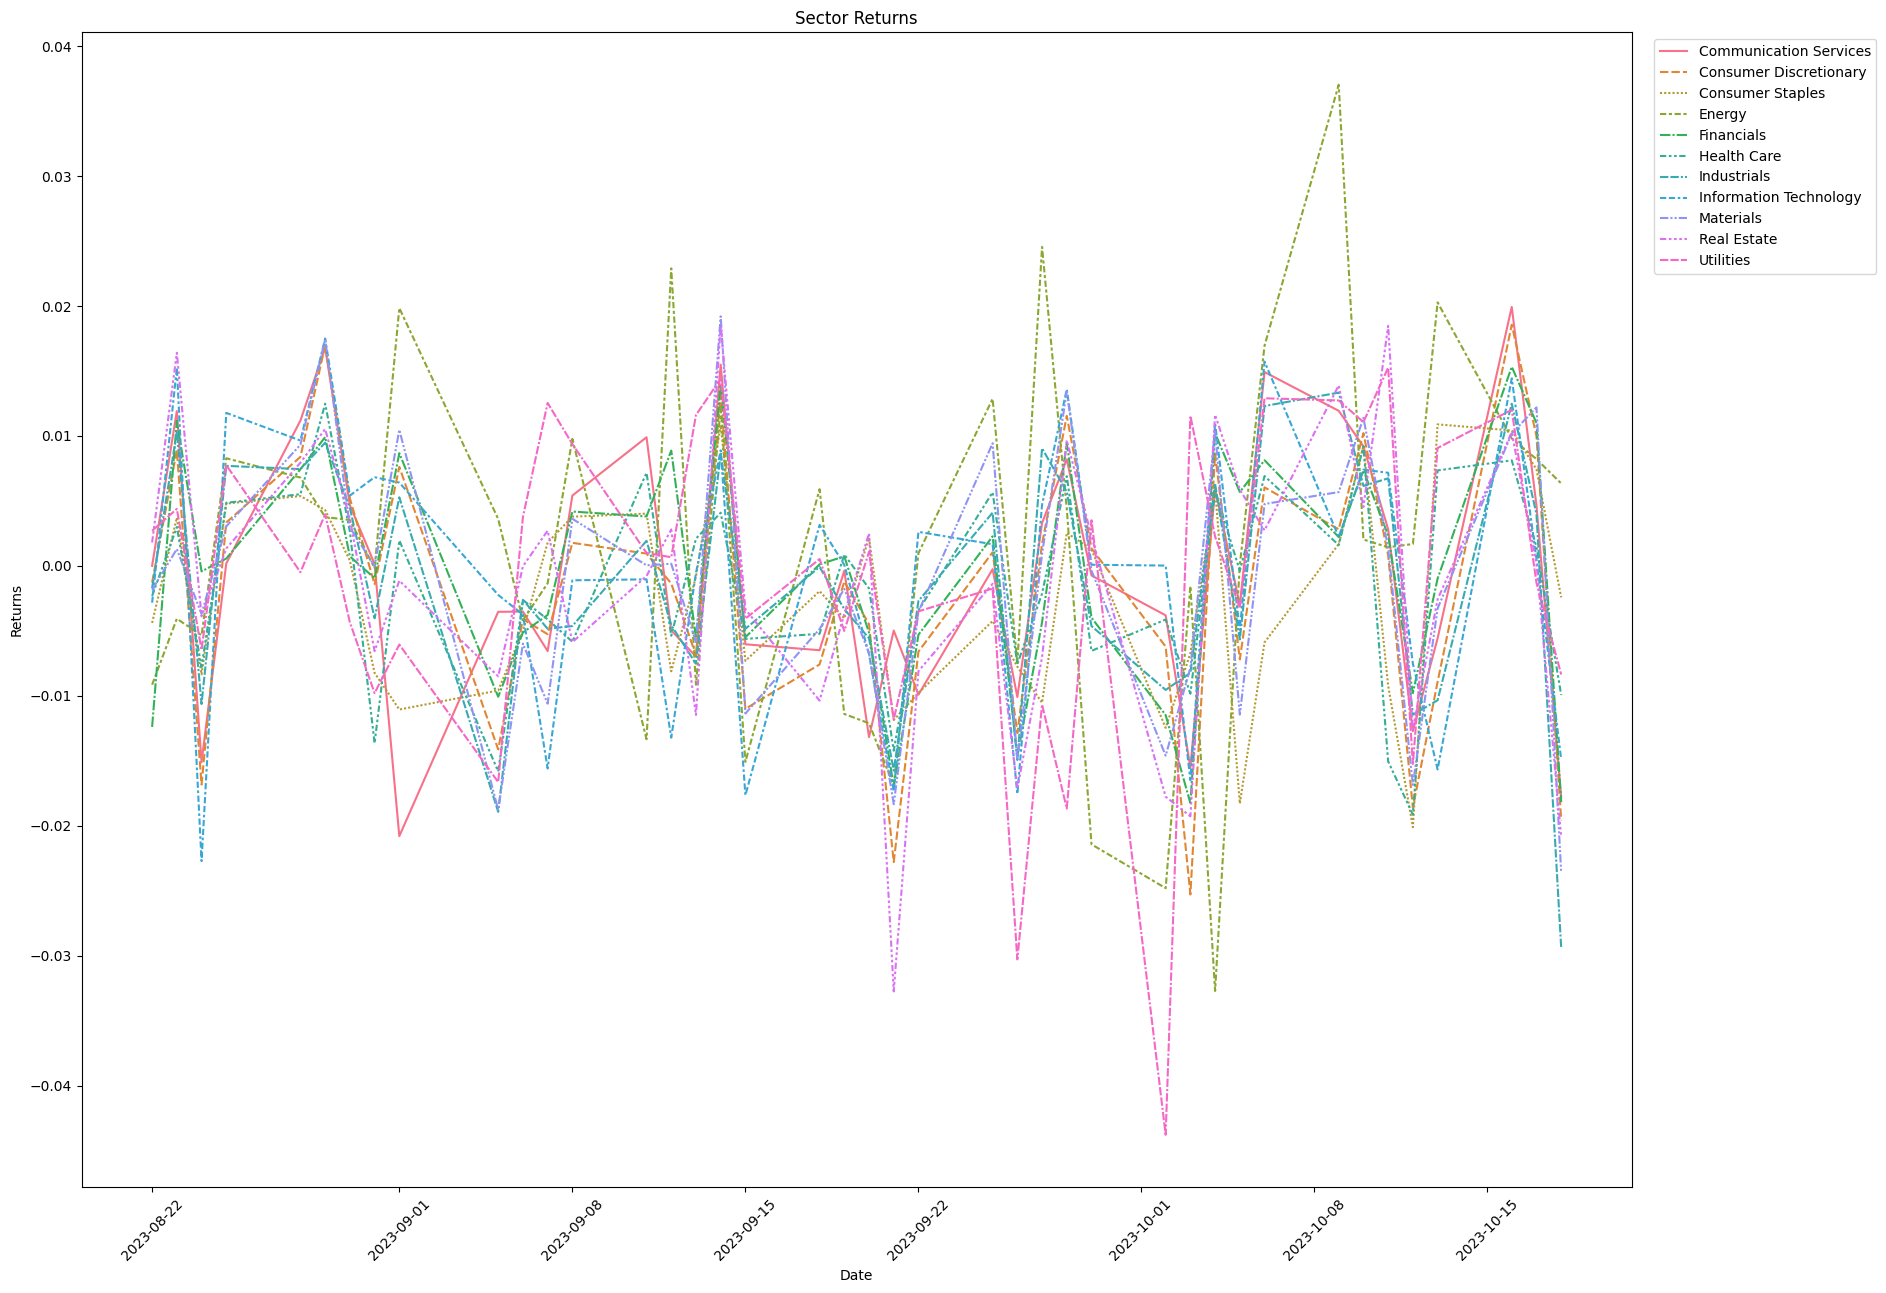

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a method to plot the returns as a line chart
def returns_chart(returns, title, xlabel, ylabel):
    # Set the default figure size for all plots
    plt.figure(figsize=(20, 15))

    # Plot the sector returns on a line chart, with each sector having its own line & color
    sns.lineplot(data=returns)

    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=45)

    # Put the legend outside the plot
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

    # Set the title and axes labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

returns_chart(sector_mean_returns, 'Sector Returns', 'Date', 'Returns')


## Step 11
I am going to demonstrate using ML to predict future market returns using Linear Regression. HOWEVER, this is a VERY simplified approach & will yield inaccurate results. This demo is mainly to show you how to use historical returns to train an ML model & then use that to predict future returns. Adapt these steps according to the specific ML model you will be using.

Import the Linear Regression, train_test_split, and metrics modules from sklearn

In [112]:
# Import Linear Regression, train_test_split, and metrics from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 12
Run a linear regression on each sector and produce the predicted returns. Split the dataset into training & testing datasets.

In [113]:
# Define a dataframe to keep track of RMSE & R2 scores for each sector
scores = pd.DataFrame(columns=['RMSE', 'R2'])

# Define a dictionary to store all the predicted returns for each sector
predicted_returns = {}

# Define a random seed for reproducibility
np.random.seed(0)

# Loop through each sector and fit a linear regression model to the data
for sector in sector_mean_returns.columns:
# Get the historical returns for the current sector
    y = sector_mean_returns[sector]

    # Get the historical returns for all other sectors
    X = sector_mean_returns.drop(columns=[sector])

    # Split the data into training and testing sets. I'm choosing a split that has a 70/30 split (70% training, 30% testing)
    # The 30% testing is equivalent to 18 months of data (30% of 60 months = 18 months)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Get the predicted returns based on the testing set
    y_pred = model.predict(X_test)

    # Get the root mean squared error (RMSE) for the model
    mse = mean_squared_error(y_test, y_pred)

    # Get the R-squared score for the model
    r2 = r2_score(y_test, y_pred)

    # Print the MSE & R2 score in the form of a dataframe
    scores.loc[sector] = [np.sqrt(mse), r2]

    # Add the predicted returns to the dictionary
    predicted_returns[sector] = y_pred

print(scores)


                            RMSE        R2
Communication Services  0.008563  0.431572
Consumer Discretionary  0.004806  0.859933
Consumer Staples        0.007631  0.460872
Energy                  0.022131 -0.668506
Financials              0.006532  0.633814
Health Care             0.007030  0.400296
Industrials             0.005712  0.777200
Information Technology  0.007172  0.556254
Materials               0.006261  0.711686
Real Estate             0.009481  0.449734
Utilities               0.012201  0.406915


## Step 13
After doing this, generate a new dataframe for storing the predicted returns. Specify the length of the dataframe to be the same as the number of predicted returns.

In [114]:
# Define a random seed
np.random.seed(0)

# Define the number of days to forecast by taking the length of the list in the first key of predicted_returns
num_periods = len(predicted_returns[list(predicted_returns.keys())[0]])


# Get a list of 6 months of dates from the current date
future_dates = pd.date_range(today, periods=num_periods, freq='D').strftime('%Y-%m-%d').tolist()

# Create a new dataframe with the future dates as the index and the 11 sector names as the columns
forecasted_returns = pd.DataFrame(index=future_dates, columns=sector_mean_returns.columns)

# Fill in each sector in the dataframe with the predicted returns
for sector in sector_mean_returns.columns:
    forecasted_returns[sector] = predicted_returns[sector]

forecasted_returns



,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2023-10-19,-0.001671,-0.011074,-0.011266,-0.005360,-0.016185,-0.005735,-0.009894,0.001666,-0.007631,-0.010605,-0.020405
2023-10-20,-0.014624,-0.014317,-0.010397,-0.012910,-0.006540,-0.008529,-0.012178,-0.025112,-0.022838,-0.027919,0.002842
2023-10-21,0.011070,0.008986,0.006666,0.003578,0.003414,0.009315,0.003173,0.008672,0.007911,0.013184,0.006486
2023-10-22,-0.020785,-0.005675,-0.000262,0.004272,-0.004768,-0.013384,0.002062,-0.013394,-0.002508,-0.006532,-0.022832
2023-10-23,-0.002747,0.007816,0.004364,0.012337,0.003996,0.000173,0.012856,0.009546,0.009670,0.001294,-0.008274
2023-10-24,0.000890,0.008942,-0.000047,0.003451,0.011923,0.001597,0.008384,0.002751,0.003254,0.001012,0.009057
2023-10-25,0.009780,0.008586,0.006248,0.000549,0.007234,0.007568,0.007174,0.010831,0.011164,0.010623,0.008406
2023-10-26,-0.003851,0.004874,-0.000980,0.014475,0.005148,-0.003964,0.000784,-0.000147,-0.003052,0.002280,-0.001843
2023-10-27,-0.017020,-0.014904,-0.014314,0.003456,-0.011124,-0.016311,-0.012585,-0.016544,-0.017353,-0.020935,-0.017961
2023-10-28,-0.003101,-0.004697,0.000889,-0.022754,0.004036,-0.004370,-0.002328,-0.016685,-0.004449,-0.006340,0.012540


## Step 14
Plot the predicted returns.

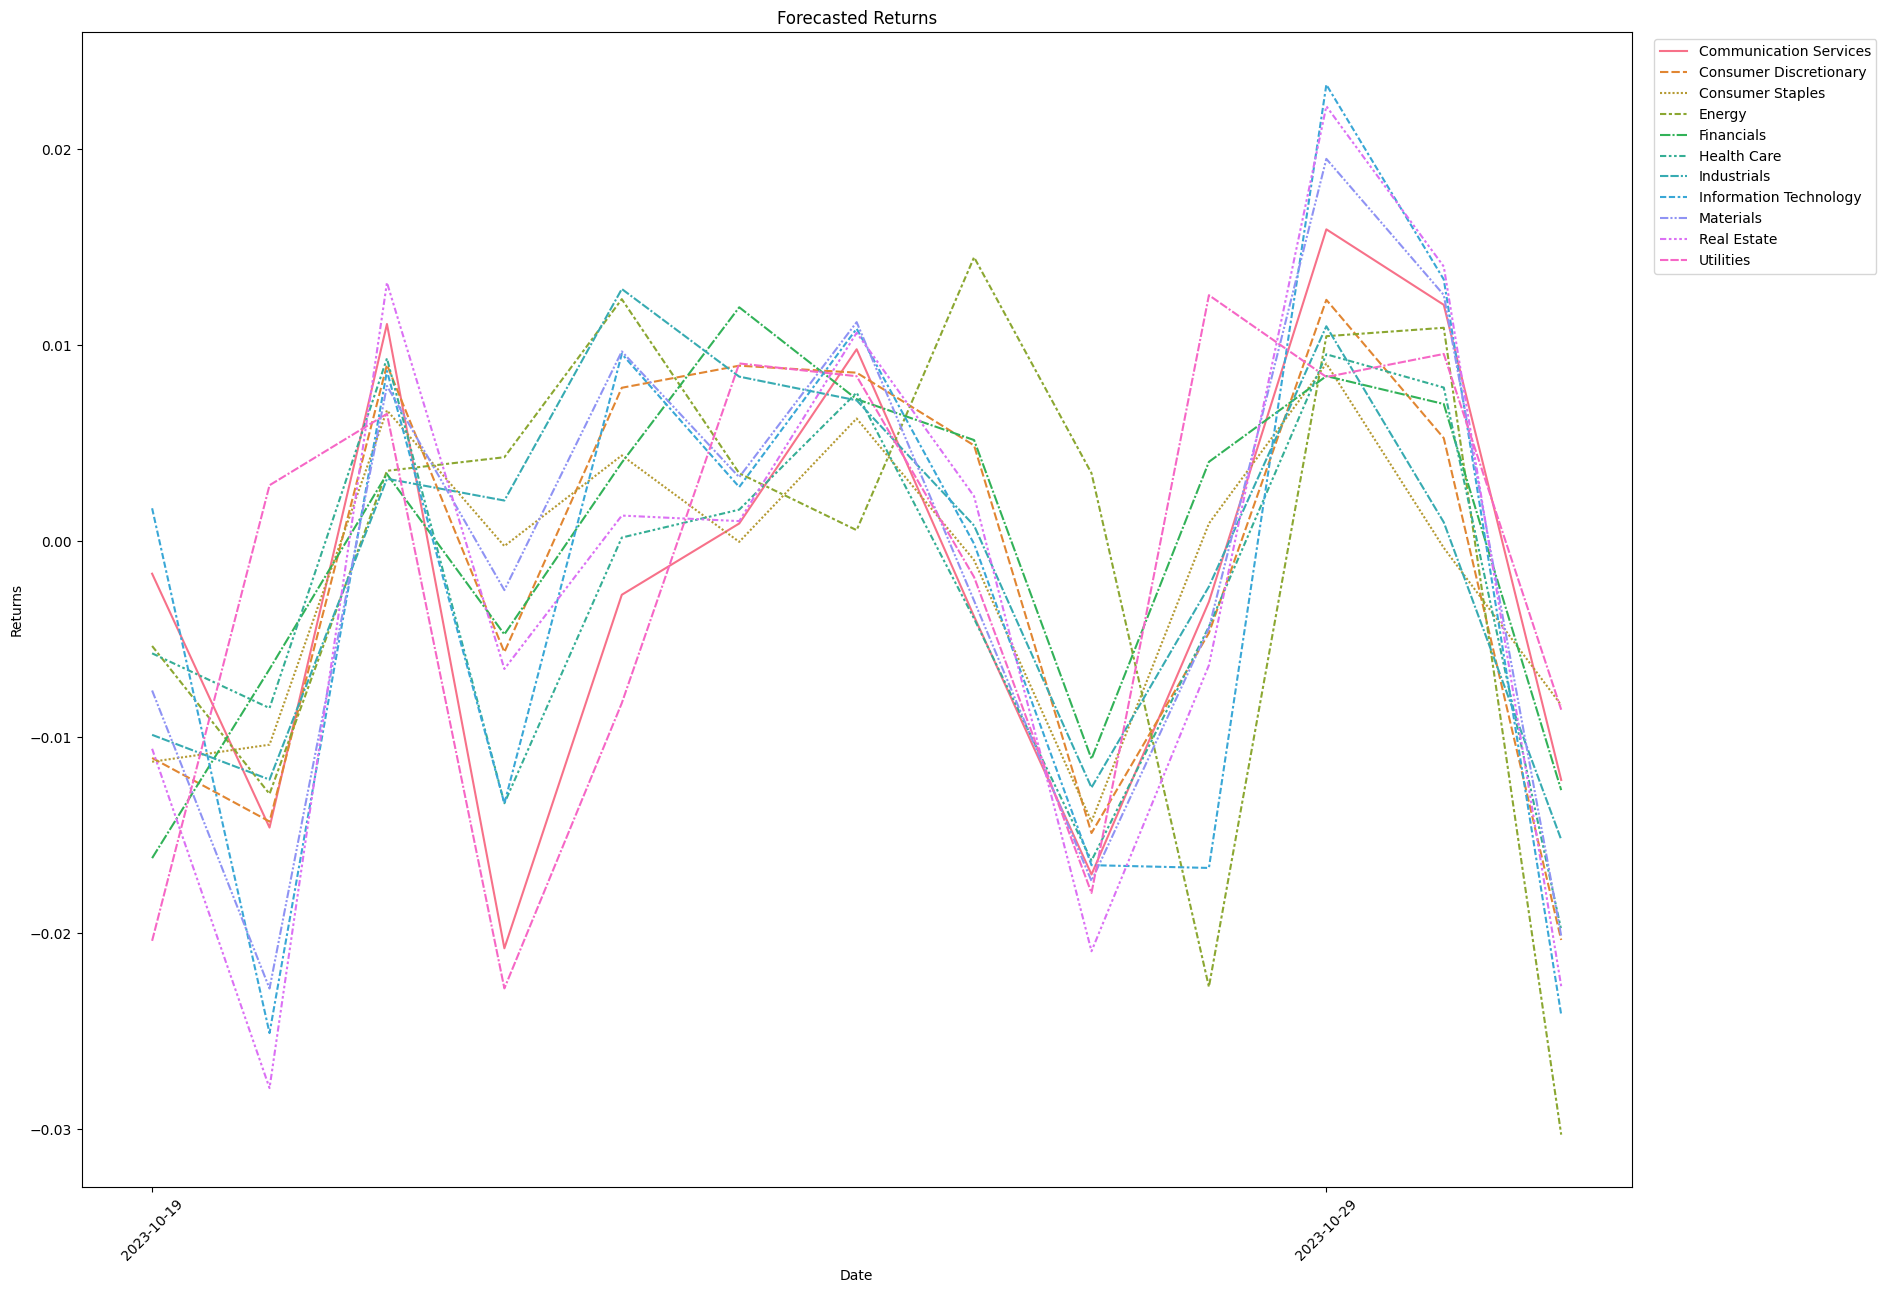

In [115]:
returns_chart(forecasted_returns, 'Forecasted Returns', 'Date', 'Returns')

# Only display an x-axis label every 10 days
plt.gca().set_xticks(plt.gca().get_xticks()[::10])

## Step 15
Concatenate the future predictions dataframe onto the historical predictions dataframe. This gets the dataframe ready for further processing to optimize & produce our final weights.

Plot both the historical returns & future returns. Draw a vertical line to indicate where future returns start.

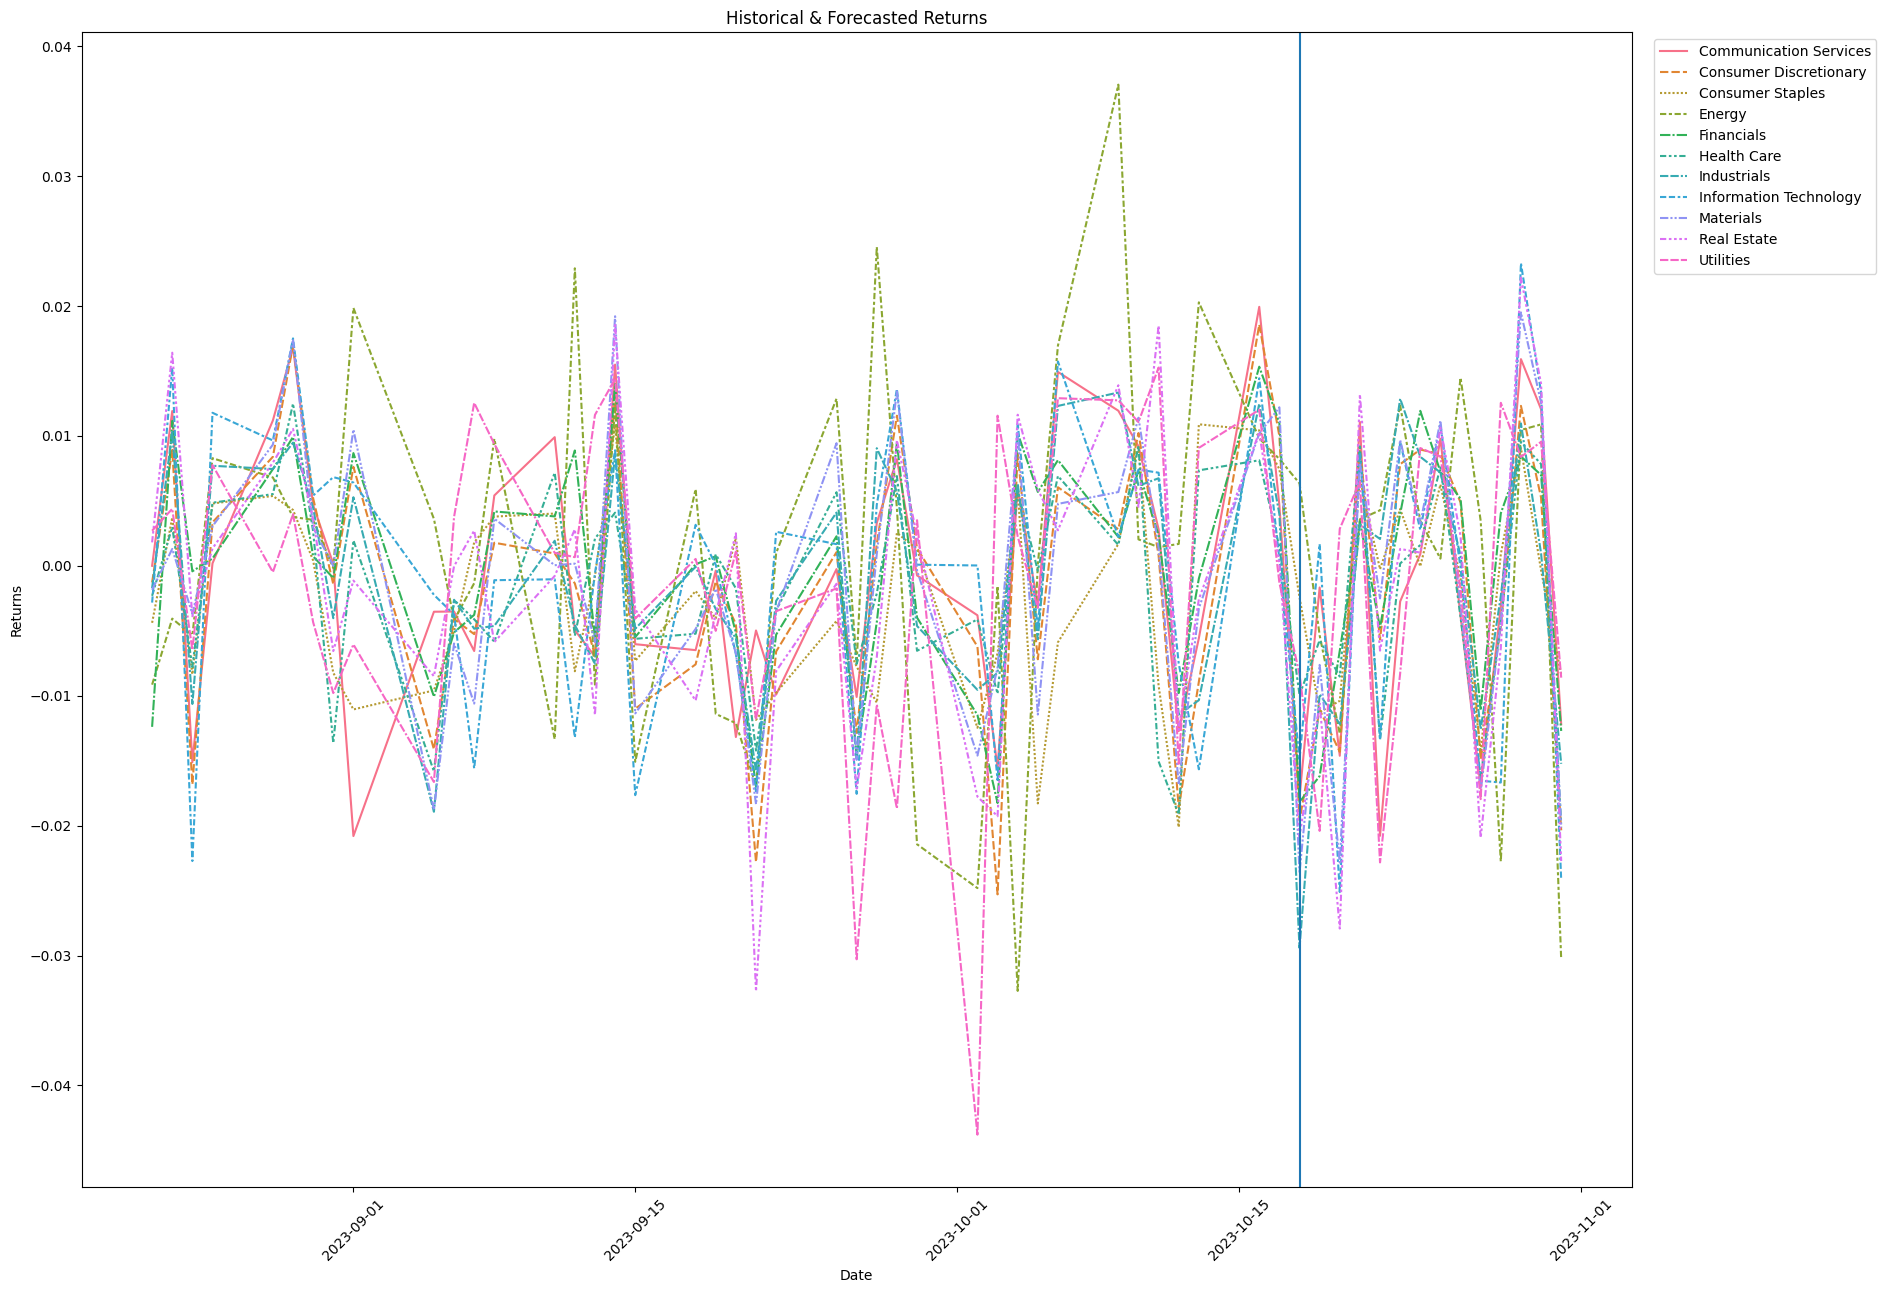

In [117]:
# Concatenate future returns dataframe onto historical returns dataframe
all_returns = pd.concat([sector_mean_returns, forecasted_returns])

# Plot the returns
returns_chart(returns=all_returns, title='Historical & Forecasted Returns', xlabel='Date', ylabel='Returns')

# Draw a vertical line where the historical returns end and the forecasted returns begin
plt.axvline(x=sector_mean_returns.index[-1])

## Step 16
Calculate portfolio stats using the historical AND predicted returns.

In [118]:
# Calculate portfolio stats using historical & predicted returns
new_output = pd.DataFrame(portfolio_stats(weights, all_returns), index=['Annual Portfolio Return', 'Annual Portfolio Volatility', 'Sharpe Ratio'], columns=['Historical & Predicted Returns'])
pd.concat([output, new_output], axis=1)

,Value,Historical & Predicted Returns
Annual Portfolio Return,-0.009139,-0.010570
Annual Portfolio Volatility,0.024030,0.025604
Sharpe Ratio,-0.380335,-0.412819
